In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

In [2]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')

In [8]:
isCD4 = celllabels=='CD4'

In [11]:
np.sum(((isCSF==False))[isCD4])

13933

In [3]:
colors = ['#ff0000', '#e30000', '#c70000', '#732b20', '#c7601c', '#ff9924', '#735210', '#ab9f00', '#eeff00', '#2b5724', '#1cc749', '#1cc7a5', '#5fc9e3', '#24b6ff', '#205773', '#3061ab', '#001f73', '#6b7fff', '#601cc7', '#8f3c89', '#ff24d3', '#570023', '#ff4778']
mean_pos = []
for i,x in enumerate(np.unique(celllabels)):
    idx = (celllabels==x)
    mean_pos.append([np.median(latent_u[idx,0]),np.median(latent_u[idx,1])])


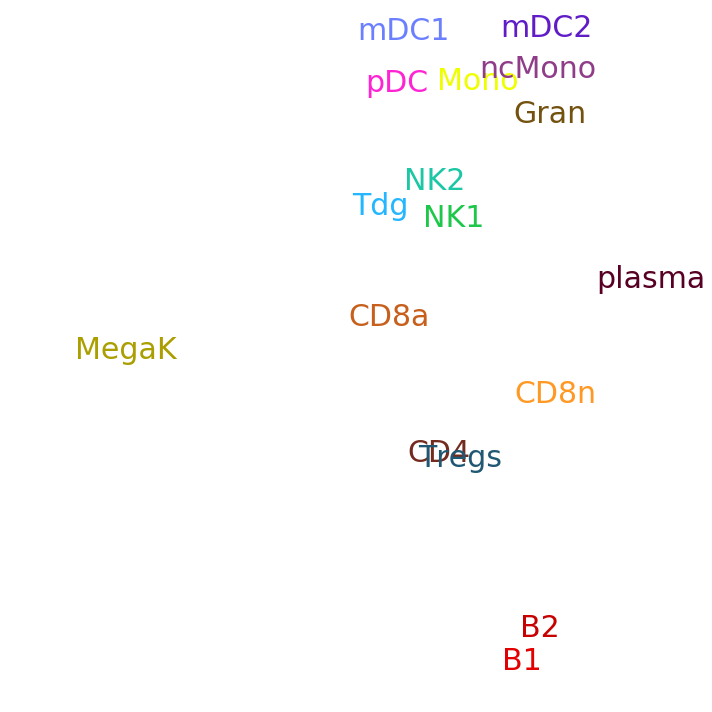

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)
        ax.scatter(latent_u[idx, 0][0], latent_u[idx, 1][0],label=x,edgecolors='none',c=colors[i],s=5,alpha=0)
        ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure1/labels.pdf')


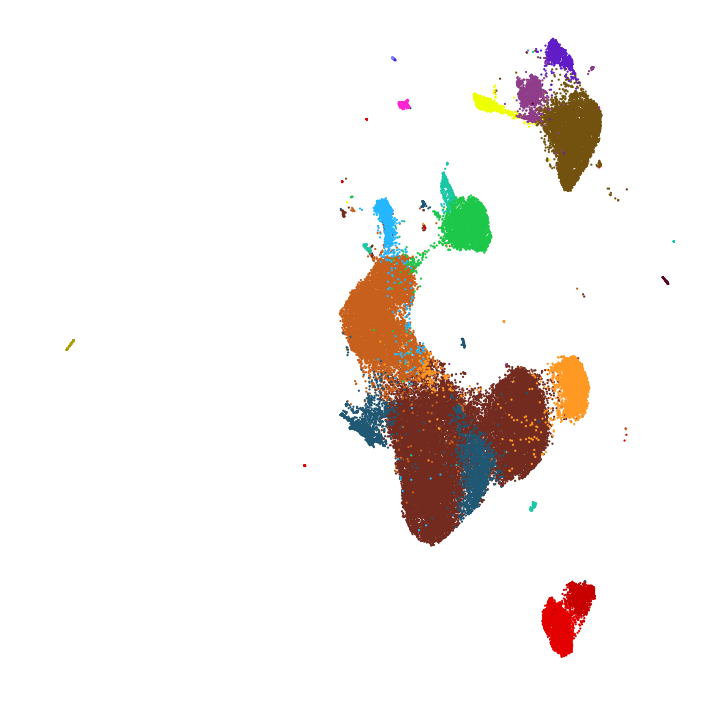

In [5]:

fig, ax = plt.subplots(figsize=(10, 10))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
#         ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure1/cluster_umap.png',dpi=300)


In [16]:
xrange = (np.min(latent_u[celllabels!='MegaK',0]),np.max(latent_u[celllabels!='MegaK',0]))
yrange = (np.min(latent_u[celllabels!='MegaK',1]),np.max(latent_u[celllabels!='MegaK',1]))


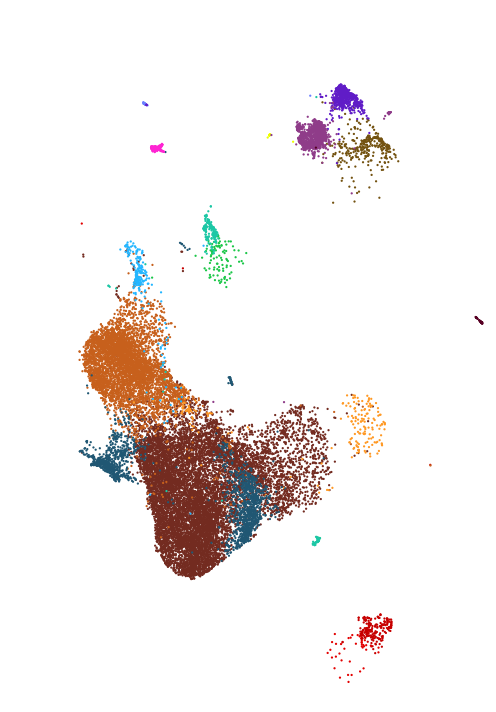

In [20]:
fig, ax = plt.subplots(figsize=(7, 10))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*isCSF
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        plt.xlim(xrange)
        plt.ylim(yrange)
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure1/cluster_umap.CSF.png',dpi=300)

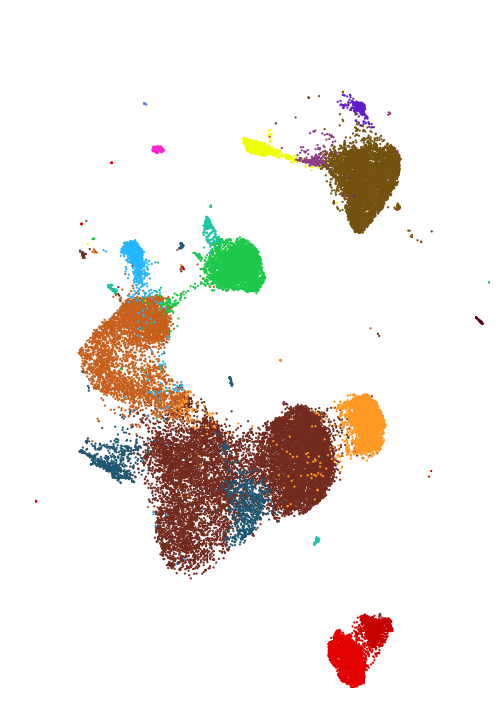

In [21]:
fig, ax = plt.subplots(figsize=(7, 10))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*(isCSF==False)
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        plt.xlim(xrange)
        plt.ylim(yrange)
#         ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure1/cluster_umap.PBMC.png',dpi=300)

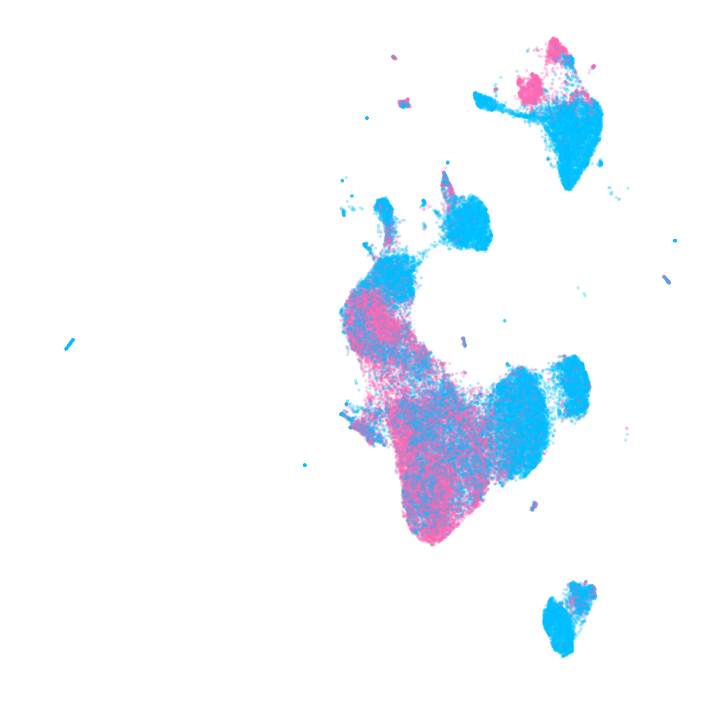

In [44]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(latent_u[clusters!=11, 0], latent_u[clusters!=11, 1],color = 'lightgray',edgecolors='none',alpha=1)
idx = validclusters
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isCSF[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figures/Figure1/allclusters.isCSF.png',dpi=300)
# plt.savefig('../CSF/figures/allclusters.legend.pdf')

In [34]:
idx

False

/data/yosef2/users/chenling/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


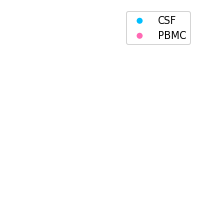

In [37]:
batchlabel = np.repeat('PBMC',len(isCSF))
batchlabel[isCSF==True]='CSF'
fig, ax = plt.subplots(figsize=(3, 3))
colors = ['deepskyblue','hotpink']
for i,x in enumerate(np.unique(batchlabel)):
    idx = ((isCSF==x)*(validclusters==True))[10]
    ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i])
    ax.legend()
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'figures/Figure1/label.isCSF.pdf')

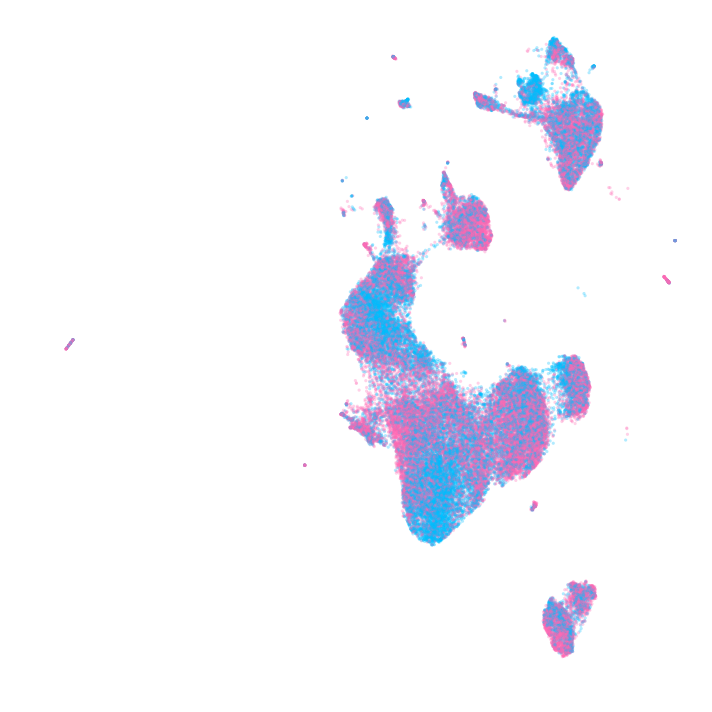

In [38]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
idx = validclusters
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isMS[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'figures/Figure1/allclusters.isMS.png',dpi=300)


/data/yosef2/users/chenling/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


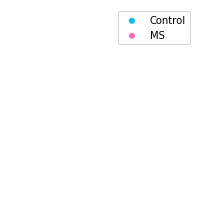

In [39]:
batchlabel = np.repeat('Control',len(isMS))
batchlabel[isMS==True]='MS'
fig, ax = plt.subplots(figsize=(3, 3))
colors = ['deepskyblue','hotpink']
for i,x in enumerate(np.unique(batchlabel)):
    idx = ((isMS==x)*(validclusters==True))[10]
    ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i])
    ax.legend()
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'figures/Figure1/label.isMS.pdf')

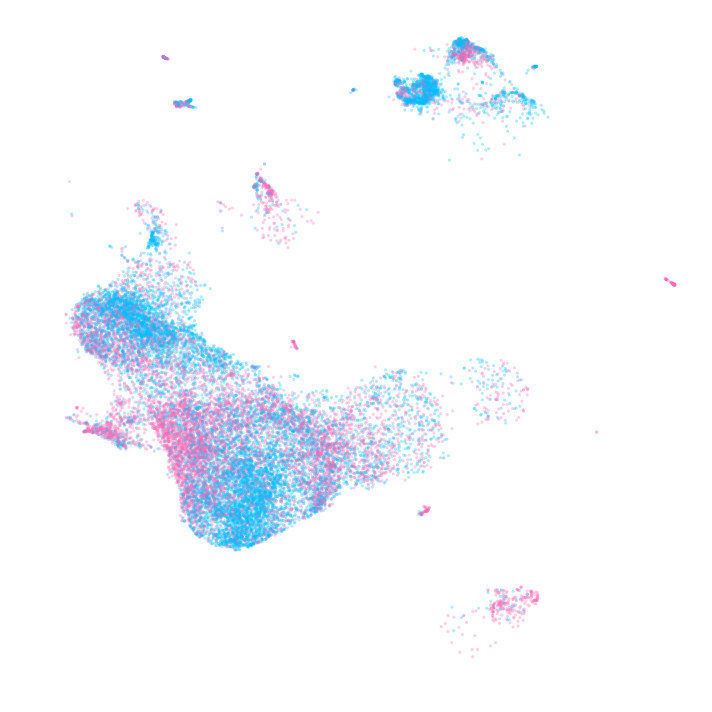

In [43]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
idx = validclusters*isCSF
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isMS[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'figures/Figure1/allclusters.isMSinCSF.png',dpi=300)


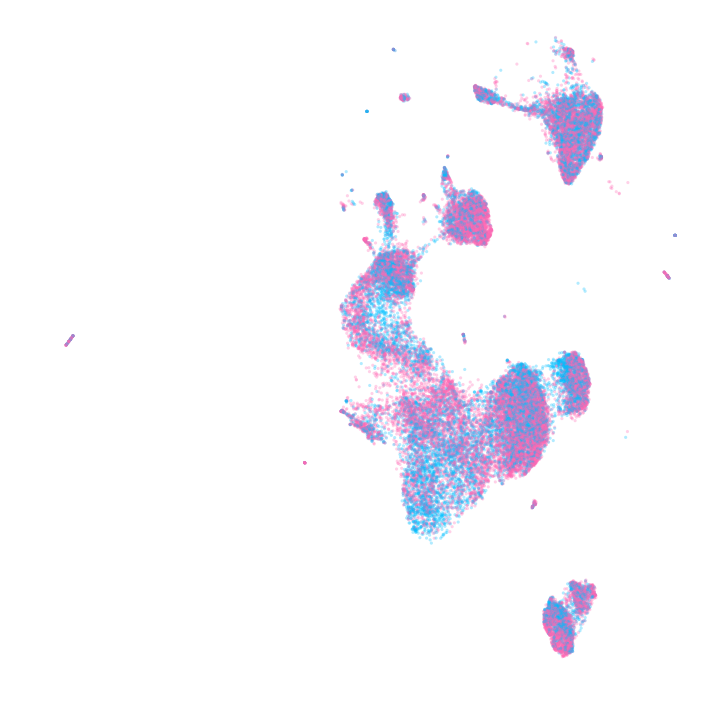

In [42]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
idx = validclusters*(isCSF==False)
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isMS[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path + 'figures/Figure1/allclusters.isMSinPBMC.png',dpi=300)
